In [1]:
% matplotlib inline

import pandas as pd, numpy as np
import seaborn as sns
import utils.stats as stats
import utils.viz as viz
import statsmodels.formula.api as smf
import utils.viz as viz
from scipy.stats import shapiro
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

data_dir = '/Users/sabine/workspace/distconnect_macaque/data'
yerkes_dir = '/Users/sabine/data/Yerkes19'

df_r = pd.read_pickle('%s/df_regionwise.pkl' % data_dir)
df_p = pd.read_pickle('%s/df_pairwise.pkl' % data_dir)

In [2]:
df_r = df_r.rename(columns={'injection distance from nearest primary region': "dist_inj_prim",
                            'incoming': "connectivity_distance"})

# analysis

#### initial model to check for outliers

In [3]:
excl_areas = ['10', '11', '13', '14', '24c', '25', '32', '46d', '46v', '9', 'F6', 'OPAI']

fltr = df_r.area.isin(excl_areas)
fltr = (df_r.area.isin(excl_areas) | df_r.connectivity_distance.isnull())


model = smf.ols(formula='connectivity_distance ~ location \
                                                 + region_size \
                                                 + dist_inj_prim', data=df_r[~fltr]).fit()
print model.summary()

                              OLS Regression Results                             
Dep. Variable:     connectivity_distance   R-squared:                       0.543
Model:                               OLS   Adj. R-squared:                  0.481
Method:                    Least Squares   F-statistic:                     8.718
Date:                   Thu, 30 Aug 2018   Prob (F-statistic):           0.000534
Time:                           22:53:41   Log-Likelihood:                -65.757
No. Observations:                     26   AIC:                             139.5
Df Residuals:                         22   BIC:                             144.5
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       

In [4]:
df_r['struct_resid'] = 999
df_r['struct_resid'][~fltr] = model.resid

df_r['struct_stud_resid'] = 999
df_r['struct_stud_resid'][~fltr] = model.outlier_test()['student_resid']

df_r['struct_unadj_p'] = 999
df_r['struct_unadj_p'][~fltr] = model.outlier_test()['unadj_p']

df_r['struct_bonf_p'] = 999
df_r['struct_bonf_p'][~fltr] = model.outlier_test()['bonf(p)']

/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-pack

In [5]:
df_outl_1 = df_r[['area', 'dist_inj_prim', 'connectivity_distance', 
                'struct_resid', 'struct_stud_resid', 'struct_unadj_p', 'struct_bonf_p']][~fltr]

In [6]:
df_outl_1.sort_values(by='struct_stud_resid').head()

,area,dist_inj_prim,connectivity_distance,struct_resid,struct_stud_resid,struct_unadj_p,struct_bonf_p
21,TEpd,27.890625,14.170338,-7.990284,-3.344438,0.003073,0.079908
65,8B,22.500000,13.575339,-3.148467,-1.055353,0.303255,1.000000
45,7B,12.906250,16.025179,-2.930100,-0.945203,0.355305,1.000000
10,STPc,10.773438,15.879031,-2.969877,-0.943693,0.356058,1.000000
34,V1,0.000000,25.740364,-1.869369,-0.829785,0.415994,1.000000


In [7]:
df_outl_1.sort_values(by='struct_stud_resid').tail()

,area,dist_inj_prim,connectivity_distance,struct_resid,struct_stud_resid,struct_unadj_p,struct_bonf_p
42,9_46d,19.812500,17.711961,2.224252,0.737985,0.468691,1.000000
7,DP,22.078125,24.766858,3.547299,1.200520,0.243305,1.000000
44,9_46v,26.453125,20.402974,3.563454,1.256535,0.222720,1.000000
47,5,10.250000,26.805691,5.483681,1.827052,0.081940,1.000000
39,7A,19.093750,28.055723,6.710558,2.440189,0.023631,0.614411


=> TEpd has studentized residual of > 3 and will subsequently be removed from the GLM

## Rerun model without TEpd and correct condist values 

In [8]:
excl_areas = ['10', '11', '13', '14', '24c', '25', '32', '46d', '46v', '9', 'F6', 'OPAI', 'TEpd']


fltr = (df_r.area.isin(excl_areas) | df_r.connectivity_distance.isnull())

In [9]:
null = smf.ols(formula='connectivity_distance ~  location \
                                                 + region_size', data=df_r[~fltr]).fit()

df_r['corrected_condist'] = 999
df_r['corrected_condist'][~fltr] = null.resid + df_r.connectivity_distance[~fltr].mean() # for plotting

/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
model = smf.ols(formula='connectivity_distance ~ location \
                                                 + region_size \
                                                 + dist_inj_prim', data=df_r[~fltr]).fit()
print model.summary()

                              OLS Regression Results                             
Dep. Variable:     connectivity_distance   R-squared:                       0.686
Model:                               OLS   Adj. R-squared:                  0.642
Method:                    Least Squares   F-statistic:                     15.32
Date:                   Thu, 30 Aug 2018   Prob (F-statistic):           1.65e-05
Time:                           22:53:56   Log-Likelihood:                -58.381
No. Observations:                     25   AIC:                             124.8
Df Residuals:                         21   BIC:                             129.6
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       

In [11]:
df_r['struct_resid'] = 999
df_r['struct_resid'][~fltr] = model.resid

df_r['struct_stud_resid'] = 999
df_r['struct_stud_resid'][~fltr] = model.outlier_test()['student_resid']

df_r['struct_unadj_p'] = 999
df_r['struct_unadj_p'][~fltr] = model.outlier_test()['unadj_p']

df_r['struct_bonf_p'] = 999
df_r['struct_bonf_p'][~fltr] = model.outlier_test()['bonf(p)']

/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sabine/anaconda2/envs/distconnect/lib/python2.7/site-pack

In [12]:
df_r[['area', 'dist_inj_prim', 'connectivity_distance', 'corrected_condist', 
       'struct_resid', 'struct_stud_resid', 'struct_unadj_p', 'struct_bonf_p']]#.head()

,area,dist_inj_prim,connectivity_distance,corrected_condist,struct_resid,struct_stud_resid,struct_unadj_p,struct_bonf_p
0,V2,1.760742,27.339906,21.283430,2.110476,0.901518,0.378042,1.0
1,V3,NaN,NaN,999.000000,999.000000,999.000000,999.000000,999.0
2,V3A,NaN,NaN,999.000000,999.000000,999.000000,999.000000,999.0
3,V4,9.414062,21.862580,18.118434,-2.345032,-0.910354,0.373478,1.0
4,V4t,NaN,NaN,999.000000,999.000000,999.000000,999.000000,999.0
5,LIP,NaN,NaN,999.000000,999.000000,999.000000,999.000000,999.0
6,PIP,NaN,NaN,999.000000,999.000000,999.000000,999.000000,999.0
7,DP,22.078125,24.766858,24.479123,1.694720,0.696161,0.494340,1.0
8,STPr,8.320312,15.785607,17.018985,-0.394435,-0.148003,0.883822,1.0
9,STPi,8.437500,15.372443,15.945909,-1.816553,-0.685605,0.500833,1.0


# Combine func and struct

In [13]:
df_func = pd.read_pickle('./data/df_revrequest2_outlcomp_glm2.pkl')

In [14]:
df_func.columns = ['area', 'condist', 'primdist', 'residual', 'studentized residual', 
                   'p-value', 'Bonferroni corrected p-value']
df_func = df_func[['area', 'primdist', 'condist', 'residual', 'studentized residual', 
                   'p-value', 'Bonferroni corrected p-value']]
df_func['type'] = 'functional'
df_func.head()

,area,primdist,condist,residual,studentized residual,p-value,Bonferroni corrected p-value,type
0,1,1.347755,7.371935,0.299777,0.079833,0.936583,1.0,functional
3,12,15.395721,7.351674,-5.101475,-1.372388,0.174033,1.0,functional
6,2,2.930141,7.664601,-0.013680,-0.003623,0.997119,1.0,functional
7,23,6.448689,9.042482,0.016441,0.004321,0.996564,1.0,functional
8,24a,17.813653,19.017131,5.637806,1.537633,0.128347,1.0,functional


In [15]:
df_struct = df_r[['area', 'dist_inj_prim', 'corrected_condist', 
                  'struct_resid', 'struct_stud_resid', 'struct_unadj_p', 'struct_bonf_p']][~fltr]
df_struct.columns = ['area', 'primdist', 'condist', 'residual', 'studentized residual', 
                   'p-value', 'Bonferroni corrected p-value']
df_struct['type'] = 'structural'
df_struct.head()

,area,primdist,condist,residual,studentized residual,p-value,Bonferroni corrected p-value,type
0,V2,1.760742,21.283430,2.110476,0.901518,0.378042,1.0,structural
3,V4,9.414062,18.118434,-2.345032,-0.910354,0.373478,1.0,structural
7,DP,22.078125,24.479123,1.694720,0.696161,0.494340,1.0,structural
8,STPr,8.320312,17.018985,-0.394435,-0.148003,0.883822,1.0,structural
9,STPi,8.437500,15.945909,-1.816553,-0.685605,0.500833,1.0,structural


In [16]:
df = pd.concat([df_func, df_struct])

In [17]:
df.tail()

,area,primdist,condist,residual,studentized residual,p-value,Bonferroni corrected p-value,type
60,F7,19.765625,18.934579,-1.450178,-0.566074,0.577640,1.0,structural
61,F5,3.525391,16.918431,0.861285,0.333069,0.742548,1.0,structural
62,ProM,8.804688,15.101935,-2.220911,-0.849424,0.405699,1.0,structural
65,8B,22.500000,17.334051,-4.023931,-1.709700,0.102792,1.0,structural
77,F1,0.000000,18.622483,2.157152,0.849018,0.405919,1.0,structural


In [18]:
sns.set_style("whitegrid") 

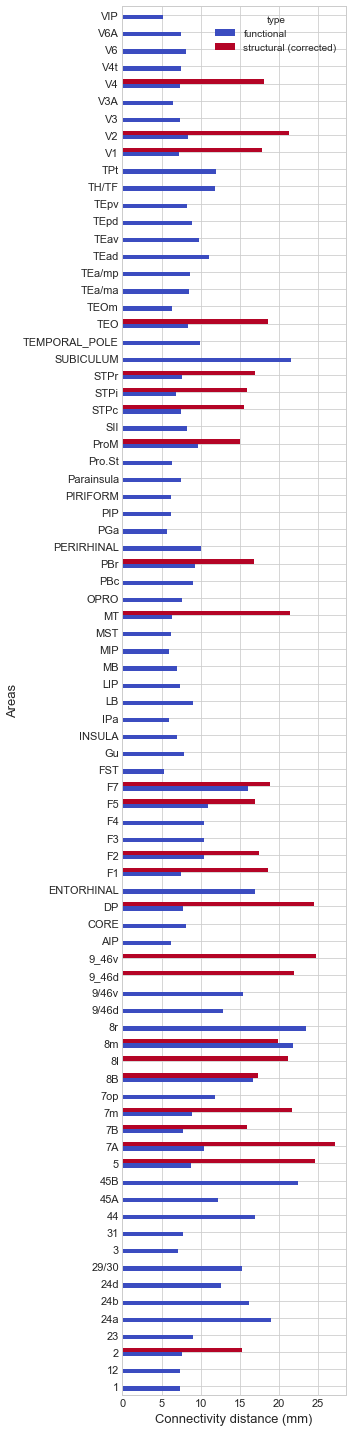

In [20]:
df.type.replace({'structural': 'structural (corrected)'}, inplace=True)
test = pd.pivot_table(df, index=['area'], columns='type', values='condist')
ax = test.plot(kind='barh', figsize=(5, 20), fontsize=11, colormap='coolwarm')
_ = ax.set_ylabel('Areas', fontdict={'fontsize':13})
_ = ax.set_xlabel('Connectivity distance (mm)', fontdict={'fontsize':13})
plt.tight_layout()
plt.savefig('/Users/sabine/Downloads/suppl_condist_vals.png', dpi=300)

### studentized residuals before before outlier removal

In [21]:
df_func = pd.read_pickle('./data/df_revrequest2_outlcomp_glm1.pkl')

In [22]:
df_func.columns = ['area', 'condist', 'primdist', 'residual', 'studentized residual', 
                   'p-value', 'Bonferroni corrected p-value']
df_func = df_func[['area', 'primdist', 'condist', 'residual', 'studentized residual', 
                   'p-value', 'Bonferroni corrected p-value']]
df_func['type'] = 'functional'
df_func.head()

,area,primdist,condist,residual,studentized residual,p-value,Bonferroni corrected p-value,type
0,1,1.347755,7.371935,0.179263,0.040067,0.968145,1.0,functional
3,12,15.395721,7.351674,-5.528021,-1.245084,0.216926,1.0,functional
6,2,2.930141,7.664601,-0.168666,-0.037486,0.970196,1.0,functional
7,23,6.448689,9.042482,-0.215195,-0.047467,0.962265,1.0,functional
8,24a,17.813653,19.017131,5.158587,1.172880,0.244507,1.0,functional


In [23]:
# struct
df_outl_1.columns = ['area', 'primdist', 'condist', 'residual', 'studentized residual', 
                   'p-value', 'Bonferroni corrected p-value']
df_outl_1['type'] = 'structural'
df_outl_1.head()

,area,primdist,condist,residual,studentized residual,p-value,Bonferroni corrected p-value,type
0,V2,1.760742,27.339906,2.087774,0.732799,0.471782,1.0,structural
3,V4,9.414062,21.862580,-1.687321,-0.533295,0.599429,1.0,structural
7,DP,22.078125,24.766858,3.547299,1.200520,0.243305,1.0,structural
8,STPr,8.320312,15.785607,-0.700886,-0.217671,0.829786,1.0,structural
9,STPi,8.437500,15.372443,-1.971094,-0.613989,0.545817,1.0,structural


In [24]:
df = pd.concat([df_func, df_outl_1])

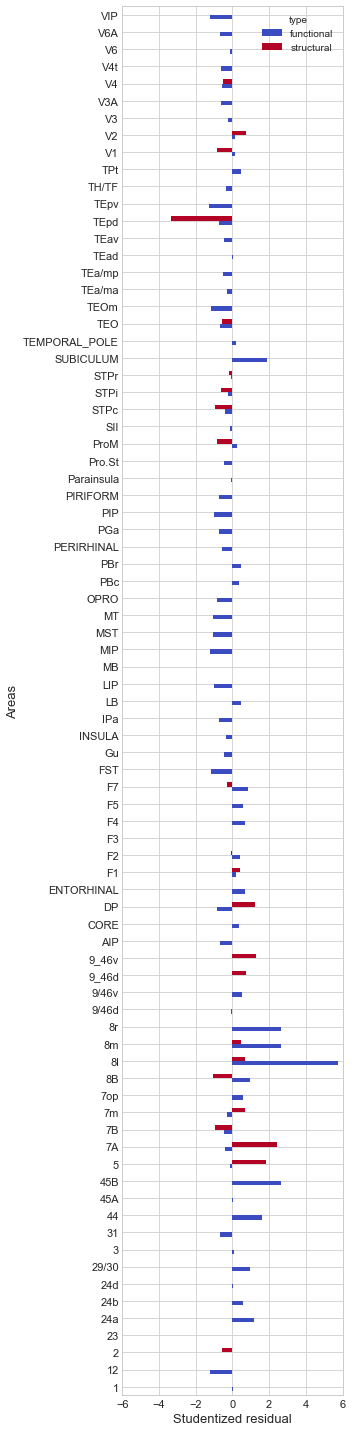

In [25]:
test = pd.pivot_table(df, index=['area'], columns='type', values='studentized residual')
ax = test.plot(kind='barh', figsize=(5, 20), fontsize=11, colormap='coolwarm')
_ = ax.set_ylabel('Areas', fontdict={'fontsize':13})
_ = ax.set_xlabel('Studentized residual', fontdict={'fontsize':13})
plt.xlim([-6, 6])
plt.tight_layout()
plt.savefig('/Users/sabine/Downloads/suppl_residuals_glm1.png', dpi=300)